In [24]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
# from selenium.webdriver.common.keys inport Keys
from webdriver_manager.chrome import ChromeDriverManager
from webdriver_manager.core.utils import ChromeType
import matplotlib.pyplot as plt
# import seaborn as sns
# import time
import re
import warnings

Creating The Driver

In [25]:
driver = webdriver.Chrome(ChromeDriverManager(chrome_type=ChromeType.BRAVE).install())
warnings.filterwarnings("ignore", category=DeprecationWarning)

C:\Users\ngang\AppData\Local\Temp\ipykernel_12560\1414848741.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager(chrome_type=ChromeType.BRAVE).install())


In [26]:
#wiki url character list
wiki_url = 'https://outlander.fandom.com/wiki/Category:Characters'
driver.get(wiki_url)

#finding characters by book
Book_categories = driver.find_elements(By.CLASS_NAME,'category-page__member-link')
#get page link redirecting to page showing characters for each book
for i in range(len(Book_categories)):
    if re.search("^Category:Characters by book", Book_categories[i].text):
        book_link = Book_categories[i].get_attribute('href')
        
driver.get(book_link)

In [27]:
novels = driver.find_elements(By.CLASS_NAME,'category-page__member-link')
#contains other books by the author

Book_list = ['Outlander',
             'Dragonfly in Amber',
             'Voyager',
             'Drums of Autumn','The Fiery Cross',
             'A Breath of Snow and Ashes',
             'An Echo in the Bone',
             'Go Tell the Bees That I Am Gone',
            ] ##list of the  main books in the series

In [28]:
books =[]
for bk in Book_list: ##filtering for only books in main series
    for i in range(len(novels)):
        book_title = novels[i].text.lstrip('Category:Characters in ')
        if bk in book_title:
        #The final book wont show debugg later
            book_url = novels[i].get_attribute('href')
            books.append({'book_title': book_title, 'url':book_url})
            
books

[{'book_title': 'Outlander (novel)',
  'url': 'https://outlander.fandom.com/wiki/Category:Characters_in_Outlander_(novel)'},
 {'book_title': 'Dragonfly in Amber',
  'url': 'https://outlander.fandom.com/wiki/Category:Characters_in_Dragonfly_in_Amber'},
 {'book_title': 'Voyager',
  'url': 'https://outlander.fandom.com/wiki/Category:Characters_in_Voyager'},
 {'book_title': 'Drums of Autumn',
  'url': 'https://outlander.fandom.com/wiki/Category:Characters_in_Drums_of_Autumn'},
 {'book_title': 'The Fiery Cross',
  'url': 'https://outlander.fandom.com/wiki/Category:Characters_in_The_Fiery_Cross'},
 {'book_title': 'A Breath of Snow and Ashes',
  'url': 'https://outlander.fandom.com/wiki/Category:Characters_in_A_Breath_of_Snow_and_Ashes'},
 {'book_title': 'An Echo in the Bone',
  'url': 'https://outlander.fandom.com/wiki/Category:Characters_in_An_Echo_in_the_Bone'},
 {'book_title': 'Go Tell the Bees That I Am Gone',
  'url': 'https://outlander.fandom.com/wiki/Category:Characters_in_Go_Tell_the

In [29]:
books[0]

{'book_title': 'Outlander (novel)',
 'url': 'https://outlander.fandom.com/wiki/Category:Characters_in_Outlander_(novel)'}

In [30]:
Character_list= []

for book in books:
    driver.get(book['url'])
    Char_elems = driver.find_elements(By.CLASS_NAME, 'category-page__member-link')
    
    for Char in Char_elems:
        Character_list.append({'Book':book['book_title'], 'Character': Char.text})

In [31]:
character_df =pd.DataFrame(Character_list)
pd.set_option('display.max_rows', None)

In [32]:
#removing character names containing '/'
filt = character_df["Character"].str.contains('/')
character_df = character_df[~filt]

In [33]:
#dropping duplicates
character_df.drop_duplicates(subset="Character", keep='first', inplace=True)

In [34]:
import os 
character_df.to_csv(f'{os.getcwd()}/characters_csv', index=False)


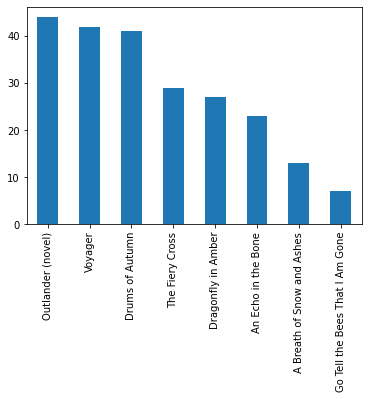

In [35]:
#Characters per book
character_df['Book'].value_counts().plot(kind='bar')
plt.show()

In [36]:
character_df.head()

,Book,Character
0,Outlander (novel),Alexander MacGregor
1,Outlander (novel),Angus Mhor
3,Outlander (novel),Father Anselm
4,Outlander (novel),Father Bain
5,Outlander (novel),Mrs. Baird
